## Task 1
#### To predict the percentage of marks of an student based on the number of study hours.


## Question
#### What will be predicted score if a student studies for 9.25 hrs/ day?

 First import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the csv file on which we have to work and displaying it for reference.

In [2]:
df=pd.read_csv("required.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To get the idea of the total number of rows in the data set we use dataframe.size

In [3]:
df.size

50

### Plotting the function

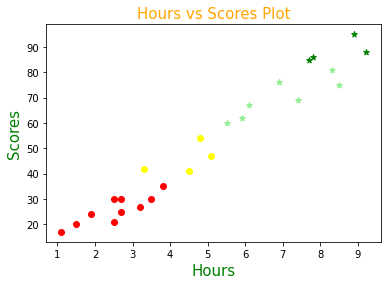

In [4]:
# For a larger view of the graph execute the next line

#plt.figure(figsize=(8,7))
plt.title("Hours vs Scores Plot",size=15,color="orange")
gl=[]
c=0
for i in df.Scores:
    if i>=85:
        plt.scatter(df.Hours[c],i,color="Green",marker='*')
    if i>=60 and i<85:
        plt.scatter(df.Hours[c],i,color="LightGreen",marker='*')
    if i>=40 and i<60:
        plt.scatter(df.Hours[c],i,color="yellow")
    if i<40:
        plt.scatter(df.Hours[c],i,color="red")
        
    c=c+1
plt.xlabel("Hours",size=15,color="Green")
plt.ylabel("Scores",size=15,color="Green")
plt.show()

#### From the above graph we can clearly see that the data is linearly dependent i.e. 
#### Scores ∝Hours Studied
#### We can also see from the above plot's colourcode that if marks scored by a person is:-
##### >=75 than it's "Green"
##### >=60 and <75 than its "Light Green"
##### >=40 and <60 than its "Yellow"
##### <40 than its "Red"

## Prepration of the Data on which the Machine Larning Model is to be trained.

In [5]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#### To begin with the training of model we first need to split our data into Training & Test data

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=42) 


### From the "Hours vs Scores Plot" we get to know that the distribution is of Linear type, thus we use Linear Regression model from sklearn.

In [7]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(x_train, y_train) 

print("Training complete.")

Training complete.


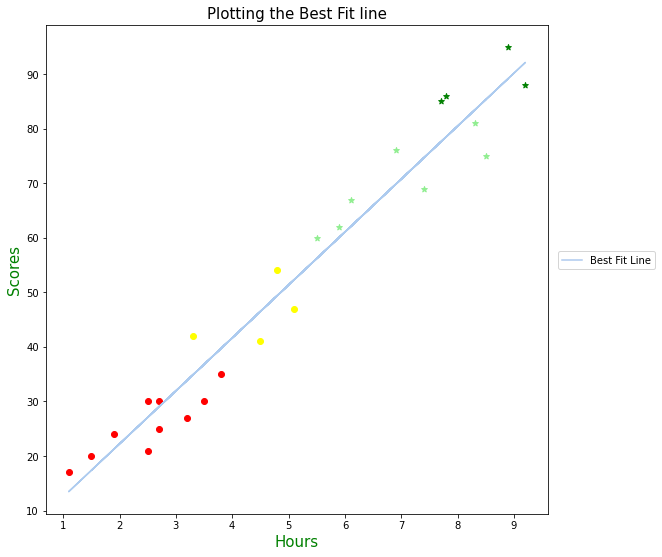

In [8]:
# Plotting the regression line
line = regr.coef_*x+regr.intercept_

# Plotting for the test data
c=0
plt.figure(figsize=(9,9))
plt.title("Plotting the Best Fit line",size=15)
for i in df.Scores:
    if i>=85:
        plt.scatter(df.Hours[c],i,color="Green",marker='*')
    if i>=60 and i<85:
        plt.scatter(df.Hours[c],i,color="LightGreen",marker='*')
    if i>=40 and i<60:
        plt.scatter(df.Hours[c],i,color="yellow")
    if i<40:
        plt.scatter(df.Hours[c],i,color="red")
        
    c=c+1
plt.xlabel("Hours",size=15,color="Green")
plt.ylabel("Scores",size=15,color="Green")
plt.plot(x, line,color='#adcbef',label="Best Fit Line")
plt.legend(loc=[1.02,0.5])
plt.show()

## PREDICTING THE SCORE

#### Now that we have trained the model we can now predict the required information.

In [9]:
# Here we predict the data based on our model and use "x_test" data
yp=regr.predict(x_test)

In [10]:
print("Actual","  ","Predicted Data")
for i in range(len(y_test)):
    print(y_test[i],"     ",yp[i])

Actual    Predicted Data
81       83.39168644881056
30       27.07054901762714
21       27.07054901762714
76       69.79692913783526
62       60.08638820142432
25       29.012657204909328
42       34.838981766755886
47       52.317955452295564


### From the above table we see that teh variation between the actual data and the predicted data.

In [11]:
# Showing the Absolute mean error between the test data and predicted data
from sklearn import metrics  
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test, yp),2)) 

Mean Absolute Error: 4.5


### After studying for 9.25 hours/day, the student scores the following marks.

In [12]:
hours=[[9.25]]
output=regr.predict(hours)
print("The student scored ",round(output[0],3),"% marks.")

The student scored  92.617 % marks.
